# DYAMOND overview

## Background reading

- [GEWEX newsletter article](https://www.gewex.org/gewex-content/uploads/2020/12/Q42020.pdf) on DYAMOND Summer

- project webpage for DYAMOND winter: https://www.esiwace.eu/services/dyamond/winter

- Hannah Christenson's poster using cloud-top temperature and calculating fractal dimension on DYAMOND Summer: https://indico.nbi.ku.dk/event/1564/timetable/#preview:5141

[Early-Career researcher competition](https://www.gewexevents.org/events/3rd-pan-gass-meetingunderstanding-and-modeling-atmospheric-processes/ecr-competition/)

## Using unsupervised neural networks to measure organisation

- Code repository: https://github.com/leifdenby/convml_tt

- spatial classification example notebook: https://github.com/leifdenby/convml_tt/blob/master/example_notebooks/model_interpretation/predictions%20and%20visualisation%20on%20rectangular%20domain.ipynb

## Data access

Table of variables: https://easy.gems.dkrz.de/_static/DYAMOND/WINTER/variable_table.html

hostname `mistralpp.dkrz.de`

MPI-M ICON-5km:
- `/pf/b/b380984/dyamond/DYAMOND_WINTER/MPI-M/ICON-5km/DW-CPL/atmos/15min/rlut/dpp0029/ml/gn`
- `rlut_15min_ICON-5km_DW-CPL_dpp0029_ml_gn_20200120000000-20200120234500.nc`

MetOffice UM-5km:

- `/pf/b/b380984/dyamond/DYAMOND_WINTER/MetOffice/UM-5km/DW-ATM/atmos/15min/rlut/r1i1p1f1/ml/gn/`
- `rlut_15min_UM-5km_DW-ATM_r1i1p1f1_ml_gn_l003000-20200120233000.nc`


## Opening a file and plotting the content on a map

In [1]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import dyamond_data

f_path = dyamond_data.make_path(model="UM-5km", data_root="/home/users/lcdenby/eurec4auk/users/lcdenby/dyamond2/")

In [3]:
ds = xr.open_dataset(f_path)
ds

<xarray.Dataset>
Dimensions:             (bnds: 2, latitude: 3840, longitude: 5120, time: 24)
Coordinates:
  * time                (time) datetime64[ns] 2020-01-20T00:30:00 ... 2020-01...
  * longitude           (longitude) float32 0.03516 0.1055 ... 359.9 360.0
  * latitude            (latitude) float32 -89.98 -89.93 -89.88 ... 89.93 89.98
Dimensions without coordinates: bnds
Data variables:
    time_bnds           (time, bnds) datetime64[ns] ...
    leadtime            (time) timedelta64[ns] ...
    latitude_longitude  int32 ...
    rlut                (time, latitude, longitude) float32 ...
Attributes: (12/16)
    CDI:                       Climate Data Interface version 2.0.0rc2 (https...
    source:                    aerosol: Easy aerosols;\n atmos: MetUM-HadGEM3...
    institution:               Met Office Hadley Centre, Fitzroy Road, Exeter...
    Conventions:               CF-1.5
    activity_id:               DYAMOND
    further_info_url:          https://www.esiwace.eu/services/dyamond-specif...
    ...                        ...
    nominal_resolution:        5 km
    references:                Walters, D., et al: The Met Office Unified Mod...
    source_type:               AGCM
    history:                   Mon May 03 15:52:28 2021: cdo -P 4 -f nc4 -z z...
    CDO:                       Climate Data Operators version 2.0.0rc2 (https...
    cdo_openmp_thread_number:  4

In [4]:
ds.isel(time=0).rlut

<xarray.DataArray 'rlut' (latitude: 3840, longitude: 5120)>
[19660800 values with dtype=float32]
Coordinates:
    time       datetime64[ns] 2020-01-20T00:30:00
  * longitude  (longitude) float32 0.03516 0.1055 0.1758 ... 359.8 359.9 360.0
  * latitude   (latitude) float32 -89.98 -89.93 -89.88 ... 89.88 89.93 89.98
Attributes:
    standard_name:  toa_outgoing_longwave_flux
    long_name:      OUTGOING LW RAD FLUX (TOA)
    units:          W m-2
    grid_mapping:   latitude_longitude
    cell_methods:   time: mean (interval: 1 hour)
    origin:         toa_outgoing_longwave_flux

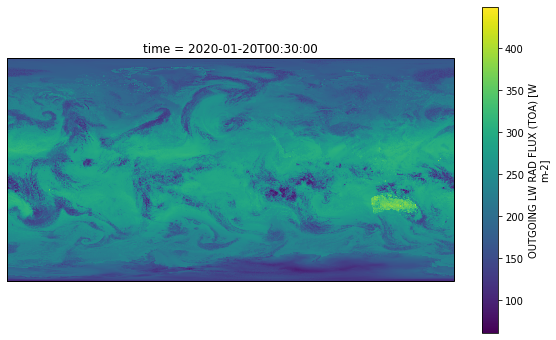

In [5]:
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()), figsize=(10, 6))

ds.isel(time=0).rlut.plot(ax=ax, transform=ccrs.PlateCarree(), rasterized=True)